# 0. 라이브러리

In [ ]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import seaborn as sns
sns.set(style='whitegrid')
%matplotlib inline

from sklearn.decomposition import PCA
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

import folium
from folium import plugins


# 나눔고딕 폰트 경로 설정
font_path = '/content/drive/MyDrive/새만금 공공 빅데이터 분석 공모전/경희/NanumGothic.ttf'

# 폰트 경로 추가
fm.fontManager.addfont(font_path)

# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. 현상황: 신재생 에너지가 남는다.

### a. 군산시 신재생 에너지 보급량/생산량 비율

In [ ]:
energy1 = pd.read_excel('/content/drive/MyDrive/새만금 공공 빅데이터 분석 공모전/경희/신재생 에너지 생산량.xlsx')

# '기초지자체' 열을 기준으로 가나다 순으로 정렬
energy1 = energy1.sort_values(by='기초지자체')

energy1.head()

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,연도,광역지자체,기초지자체,지역별 공급비중,신재생에너지 합계,재생에너지 합계,신에너지 합계,태양열,태양광,풍력,수력,해양,지열,수열,바이오,재생폐기물,연료전지,IGCC
0,2020,전북,고창군,2.19,"38,469","38,469",-,88,"35,074",-,57,-,240,138,"2,871",-,-,-
1,2020,전북,군산시,44.12,"776,681","776,578",103,77,"64,924","3,287",47,-,494,33,"687,066","20,651",103,-
14,2020,전북,기타,1.65,"29,018","29,011",7,75,909,"24,359",-,-,"1,312",-,"2,357",-,7,-
2,2020,전북,김제시,6.94,"122,149","122,149",-,106,"112,681",-,-,-,"2,758",-,"6,604",-,-,-
3,2020,전북,남원시,4.58,"80,587","80,587",-,31,"71,378",-,831,-,"1,036",8,"7,303",-,-,-


In [ ]:
energy2 = pd.read_excel('/content/drive/MyDrive/새만금 공공 빅데이터 분석 공모전/경희/신재생 에너지 보급량.xlsx')

# '기초지자체' 열을 기준으로 가나다 순으로 정렬
energy2 = energy2.sort_values(by='기초지자체')

energy2.head()

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,연도,광역지자체,기초지자체,신재생에너지 합계,태양광,풍력,수력,해양,바이오,폐기물,연료전지,IGCC
0,2020,전북,고창군,"25,127","25,127",-,-,-,-,-,-,-
1,2020,전북,군산시,"59,137","52,885",-,-,-,-,"6,000",252,-
2,2020,전북,기타,"60,000",-,"60,000",-,-,-,-,-,-
3,2020,전북,김제시,"85,838","85,838",-,-,-,-,-,-,-
4,2020,전북,남원시,"122,606","122,606",-,-,-,-,-,-,-


In [ ]:
# '기초지자체' 열만을 가지는 새로운 데이터프레임 생성
new_df = pd.DataFrame(energy2['기초지자체'])

# '신재생에너지 합계' 열의 쉼표 제거하여 숫자로 변환
new_df['신재생에너지 생산량'] = pd.to_numeric(energy1['신재생에너지 합계'].str.replace(',', ''), errors='coerce')

# '신재생에너지 합계'열을 energy2에서 추출하여 새로운 열로 추가
new_df['신재생에너지 보급량'] = pd.to_numeric(energy2['신재생에너지 합계'].str.replace(',', ''), errors='coerce')

# '잉여 에너지량' 열 추가 (생산량-보급량)
new_df['잉여 에너지량'] = new_df['신재생에너지 생산량'] - new_df['신재생에너지 보급량']

new_df.head()

new_df.to_excel('/content/drive/MyDrive/새만금 공공 빅데이터 분석 공모전/경희_잉여 전력량.xlsx', index=False)

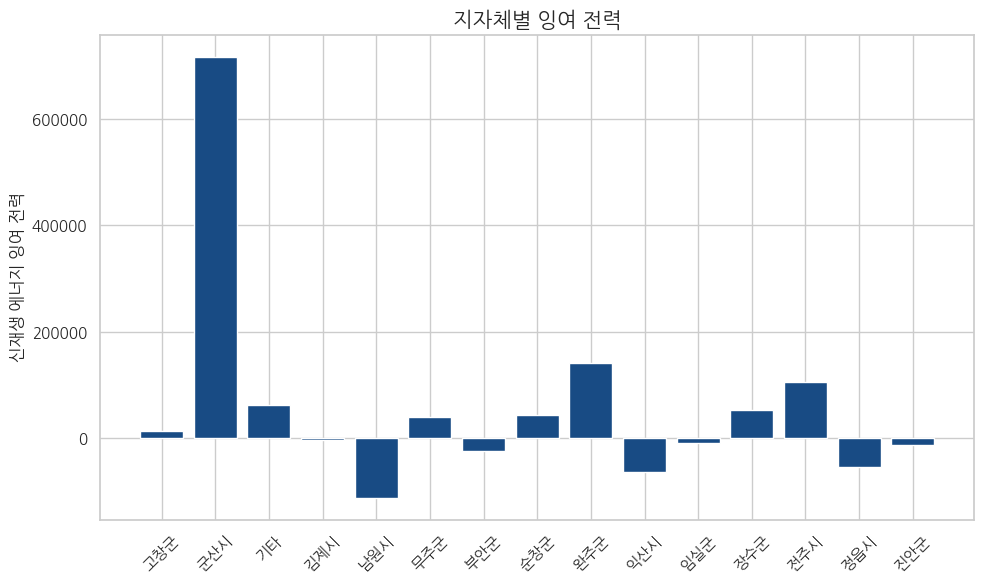

In [ ]:
# 그래프 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 설정

# '기초지자체'를 x축으로, '잉여 에너지량'를 y축으로 하는 막대 그래프 그리기
plt.bar(x=new_df['기초지자체'], height=new_df['잉여 에너지량'], color='#184B84')

# 그래프 제목과 축 라벨 설정
plt.title("지자체별 잉여 전력", fontsize= 15)  # 그래프가 생성되기 전에 제목을 설정합니다.
plt.ylabel("신재생 에너지 잉여 전력")  # y축 레이블 설정

# 그래프 표시
plt.grid(True)
plt.xticks(rotation=45)  # x축 레이블 회전
plt.tight_layout()  # 레이아웃 조정하여 글자 겹침 방지
plt.show()

글꼴 설정 다시

### b. 새만금 신재생 에너지 생산량



In [ ]:
energy3 = pd.read_csv('/content/drive/MyDrive/새만금 공공 빅데이터 분석 공모전/경희/새만금개발청_새만금 재생에너지 개발 인허가 현황_20220819.csv', encoding='euc-kr')

energy3.head()


,구분,업체명,연간 발전계획(MWh),전년도 전력생산실적(MWh),발전용량(MW),발전시설제원,점사용허가일,사업준공일,비고
0,태양광발전,CNPV,13442,16000.0,10.872,"태양광 판넬(1965×992×40mm, 300W), 에너지 저장 장치(배터리18.9...",2015-05-15,2016-04-19,"변경허가(2017-11-07), 준공(2018-03-26)"
1,풍력발전,더지오디㈜,230000,NaN,99.200,"3.6MW급 24기(블레이드반경 56.5m), 3.2MW급 4기(블레이드반경 46.5m)",2016-12-12,NaN,발전사업권 양도양수 인가(2021-11-30)
2,태양광발전(수상 2-4구역),한국수력원자력,141293,NaN,100.000,"태양광 판넬(수상용 390WP, 100MW)",2021-02-26,NaN,NaN
3,태양광발전(수상 2-5구역),한국수력원자력,141293,NaN,100.000,"태양광 판넬(수상용 390WP, 100MW)",2021-02-26,NaN,NaN
4,태양광발전(수상 2-6구역),한국수력원자력,141293,NaN,100.000,"태양광 판넬(수상용 390WP, 100MW)",2021-02-26,NaN,NaN


이 데이터는 뭘 이용해야 할지 모르겠네요

# 2. 남은 에너지를 활용하자

a. 수질오염
b. 녹색 인프라 구축

### b. 녹색 인프라 구축



In [ ]:
car_number = pd.read_csv('/content/drive/MyDrive/새만금 공공 빅데이터 분석 공모전/경희/한국전력공사_지역별 전기차 현황정보.csv', encoding='EUC-KR')

car_number


,기준일,서울,인천,경기,강원,충북,충남,대전,세종,경북,대구,전북,전남,광주,경남,부산,울산,제주,합계
0,2022-01-31,41140,12942,40239,8042,8184,10015,7675,1879,11269,16169,7389,8837,5204,12725,12501,3180,25580,232970
1,2022-02-28,41693,13179,41266,8179,8664,10525,7902,1902,11540,17091,7456,9203,5652,13536,13805,3405,26184,241182
2,2022-03-31,43206,14134,45891,8652,9683,11532,8595,2069,12318,17584,8404,9978,6015,14371,15330,3789,26702,258253
3,2022-04-30,45133,15191,50111,9117,10421,12142,9550,2180,13018,18076,8931,10658,6233,14957,16059,3948,26931,272656
4,2022-05-31,46723,16859,53239,9666,11209,12712,10213,2307,13839,18808,9310,11102,6462,15821,16630,4134,27224,286258
5,2022-06-30,48362,18329,56232,10159,11675,13298,10468,2394,14478,19705,9723,11549,6766,16486,17206,4181,27622,298633
6,2022-07-31,49590,19567,59744,10857,12603,14051,11267,2480,15663,20613,10246,12580,7152,17215,17776,4156,28241,313801
7,2022-08-31,51240,20858,63314,11538,13210,14438,11920,2555,16429,21239,11353,13050,7397,18245,18507,4184,28790,328267
8,2022-09-30,53798,22375,67941,12171,13704,15449,12525,2677,17057,22329,12162,13802,7887,19453,19858,4651,29556,347395
9,2022-10-31,55335,24222,72328,12845,14365,15987,13385,2825,17859,23407,12448,14437,8451,20983,21054,4943,30696,365570


1. 전북의 전기차 증가량 그래프를 먼저 시각화했습니다.


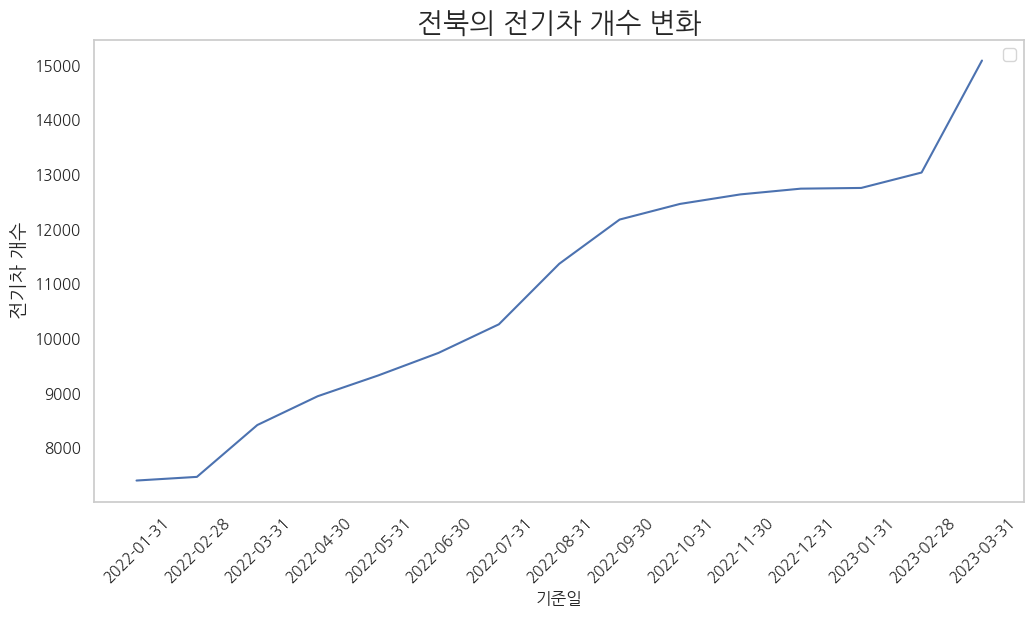

In [ ]:
# 시각화 설정
plt.figure(figsize=(12, 6))  # 가로로 길게 그리기 위해 figsize를 설정합니다.

# 전북과 합계 열의 색상을 직접 지정하여 선 그래프 그리기
sns.lineplot(x='기준일', y='전북', data=car_number)

# 그래프 제목, 축 제목 설정 (폰트사이즈 지정)
plt.title('전북의 전기차 개수 변화', fontsize=20)
plt.ylabel('전기차 개수', fontsize=14)

# x축 눈금 라벨 회전
plt.xticks(rotation=45)

# 범례 추가
plt.legend(fontsize=12)

plt.grid()

# 그래프 표시
plt.show()

In [ ]:
# 데이터 정규화 함수
def min_max_scaling(data):
    data = np.array(data)
    min_val = np.min(data)
    max_val = np.max(data)
    scaled_data = (data - min_val) / (max_val - min_val)
    return scaled_data

# 데이터 정규화
normalized_national_data = min_max_scaling(car_number['합계'])
normalized_jeonbuk_data = min_max_scaling(car_number['전북'])

# 전국과 전북 데이터를 하나의 2D 배열로 합치기
data_matrix = np.array([normalized_national_data, normalized_jeonbuk_data]).T

data_matrix

normalized_data= pd.DataFrame(data_matrix, columns=['전국', '전북'])

# '기준일' 열을 normalized_data에 삽입
normalized_data.insert(0, '기준일', car_number['기준일'])

normalized_data.to_excel('/content/drive/MyDrive/새만금 공공 빅데이터 분석 공모전/경희_전국과 전북의 전기차 개수 증가 추이.xlsx', index=True)

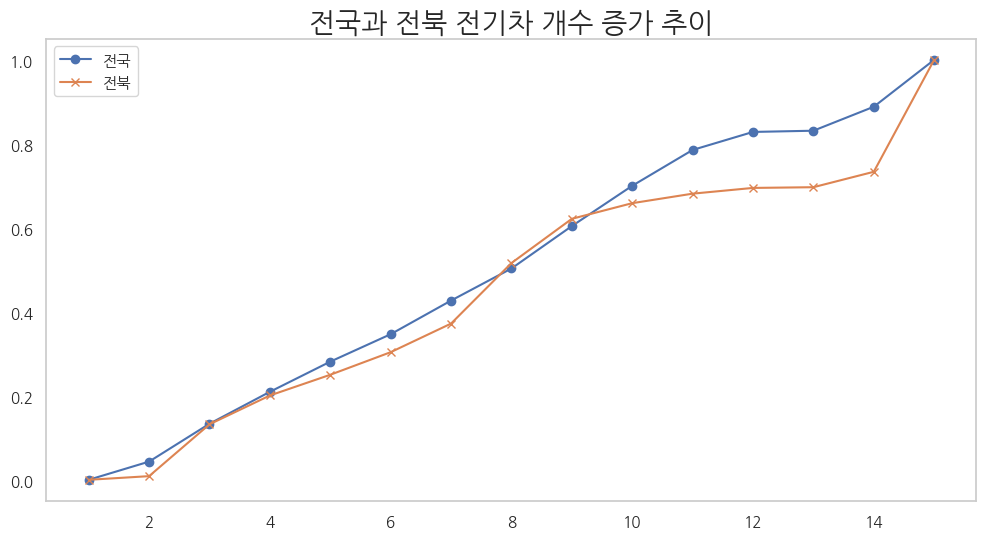

In [ ]:
# 시간에 따른 증가 추이 시각화
plt.figure(figsize=(12, 6))
time_axis = range(1, len(car_number['합계']) + 1)

# 전국 전기차 개수 증가 추이 시각화 (선 그래프로 나타냄)
plt.plot(time_axis, data_matrix[:, 0], label='전국', marker='o')

# 전북 전기차 개수 증가 추이 시각화 (선 그래프로 나타냄)
plt.plot(time_axis, data_matrix[:, 1], label='전북', marker='x')

plt.title('전국과 전북 전기차 개수 증가 추이',fontsize=20)
plt.legend()
plt.grid()
plt.show()

In [ ]:
car_number_region = pd.DataFrame({
    '지역': car_number.columns.tolist() + car_number.iloc[13].index.tolist(),
    '전기차 개수': car_number.iloc[0].tolist() + car_number.iloc[13].tolist()
})

# 데이터프레임에서 1행부터 18행까지만 남기고 나머지 행을 삭제
car_number_region = car_number_region.iloc[1:19]

# '지역' 열의 이름을 '광역지자체'로 변경
car_number_region = car_number_region.rename(columns={'지역': '광역지자체'})


car_number_region

,광역지자체,전기차 개수
1,서울,41140
2,인천,12942
3,경기,40239
4,강원,8042
5,충북,8184
6,충남,10015
7,대전,7675
8,세종,1879
9,경북,11269
10,대구,16169


In [ ]:
car_charge_fast = pd.read_csv('/content/drive/MyDrive/새만금 공공 빅데이터 분석 공모전/경희/한국에너지공단_전기차 급속충전기 지역별 설치 현황.csv', encoding='EUC-KR')

car_charge_fast

,번호,광역지자체,시군구,50키로와트,100키로와트,100키로와트듀얼,200키로와트듀얼,300키로와트이상,사용량(키로와트시)
0,1,제주,제주시,5.0,0.0,0.0,0.0,0.0,1464941
1,2,서울,마포구,7.0,0.0,0.0,0.0,0.0,609582
2,3,대구,달서구,0.0,8.0,0.0,0.0,0.0,480324
3,4,서울,용산구,10.0,0.0,0.0,0.0,0.0,472412
4,5,제주,제주시,9.0,0.0,0.0,0.0,0.0,460545
...,...,...,...,...,...,...,...,...,...
4871,4872,강원,춘천시,0.0,0.0,5.0,0.0,0.0,9843
4872,4873,경북,김천시,0.0,0.0,4.0,0.0,0.0,10510
4873,4874,경북,성주군,0.0,0.0,6.0,0.0,0.0,4414
4874,4875,경기,고양시,0.0,0.0,10.0,0.0,0.0,60959


In [ ]:
# '사용량(키로와트시)' 열의 값을 숫자로 변환하되, 공백 문자열은 0으로 처리
car_charge_fast['  사용량(키로와트시)  '] = pd.to_numeric(car_charge_fast['  사용량(키로와트시)  '], errors='coerce').fillna(0).astype(int)

# '광역지자체' 열에서 '서울' 값에 해당하는 행들을 모두 그룹화하여 '사용량(키로와트시)' 값을 합산
seoul = car_charge_fast[car_charge_fast['광역지자체'] == '서울'].groupby('광역지자체')['  사용량(키로와트시)  '].sum().reset_index()
gyunggi = car_charge_fast[car_charge_fast['광역지자체'] == '경기'].groupby('광역지자체')['  사용량(키로와트시)  '].sum().reset_index()
inchoen = car_charge_fast[car_charge_fast['광역지자체'] == '인천'].groupby('광역지자체')['  사용량(키로와트시)  '].sum().reset_index()
gangwon = car_charge_fast[car_charge_fast['광역지자체'] == '강원'].groupby('광역지자체')['  사용량(키로와트시)  '].sum().reset_index()
ryungbuk = car_charge_fast[car_charge_fast['광역지자체'] == '경북'].groupby('광역지자체')['  사용량(키로와트시)  '].sum().reset_index()
ryungnam = car_charge_fast[car_charge_fast['광역지자체'] == '경남'].groupby('광역지자체')['  사용량(키로와트시)  '].sum().reset_index()
daegu = car_charge_fast[car_charge_fast['광역지자체'] == '대구'].groupby('광역지자체')['  사용량(키로와트시)  '].sum().reset_index()
jeju= car_charge_fast[car_charge_fast['광역지자체'] == '제주'].groupby('광역지자체')['  사용량(키로와트시)  '].sum().reset_index()
chungbuk = car_charge_fast[car_charge_fast['광역지자체'] == '충북'].groupby('광역지자체')['  사용량(키로와트시)  '].sum().reset_index()
chungnam = car_charge_fast[car_charge_fast['광역지자체'] == '충남'].groupby('광역지자체')['  사용량(키로와트시)  '].sum().reset_index()
junbuk = car_charge_fast[car_charge_fast['광역지자체'] == '전북'].groupby('광역지자체')['  사용량(키로와트시)  '].sum().reset_index()
junnam = car_charge_fast[car_charge_fast['광역지자체'] == '전남'].groupby('광역지자체')['  사용량(키로와트시)  '].sum().reset_index()
gwangju = car_charge_fast[car_charge_fast['광역지자체'] == '광주'].groupby('광역지자체')['  사용량(키로와트시)  '].sum().reset_index()
ulsan = car_charge_fast[car_charge_fast['광역지자체'] == '울산'].groupby('광역지자체')['  사용량(키로와트시)  '].sum().reset_index()
busan = car_charge_fast[car_charge_fast['광역지자체'] == '부산'].groupby('광역지자체')['  사용량(키로와트시)  '].sum().reset_index()
daejeon = car_charge_fast[car_charge_fast['광역지자체'] == '대전'].groupby('광역지자체')['  사용량(키로와트시)  '].sum().reset_index()
sejong = car_charge_fast[car_charge_fast['광역지자체'] == '세종'].groupby('광역지자체')['  사용량(키로와트시)  '].sum().reset_index()

# 지자체별 사용량을 합산한 데이터프레임 생성
car_charge_usage = pd.concat([seoul, inchoen, gyunggi, gangwon, chungbuk, chungnam, daejeon, sejong, ryungbuk, daegu, junbuk, junnam, gwangju, ryungnam, busan, ulsan, jeju])

car_charge_usage

,광역지자체,사용량(키로와트시)
0,서울,19436562
0,인천,6288558
0,경기,27808619
0,강원,12102816
0,충북,9827635
0,충남,10320353
0,대전,6073732
0,세종,1496166
0,경북,17079885
0,대구,10261777


In [ ]:
# '50키로와트', '100키로와트', '100키로와트듀얼', '200키로와트듀얼', '300키로와트이상' 열의 값을 정수로 변환
car_charge_fast[[' 50키로와트 ', ' 100키로와트 ', ' 100키로와트듀얼 ', ' 200키로와트듀얼 ', ' 300키로와트이상 ']] = car_charge_fast[[' 50키로와트 ', ' 100키로와트 ', ' 100키로와트듀얼 ', ' 200키로와트듀얼 ', ' 300키로와트이상 ']].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

# '50키로와트', '100키로와트', '100키로와트듀얼', '200키로와트듀얼', '300키로와트이상' 열의 합을 구하여 '전기차 개수' 열 생성
car_charge_fast['충전소 개수'] = car_charge_fast[[' 50키로와트 ', ' 100키로와트 ', ' 100키로와트듀얼 ', ' 200키로와트듀얼 ', ' 300키로와트이상 ']].sum(axis=1)

# '광역지자체'와 '충전소 개수' 열로 이루어진 새로운 데이터프레임 생성
car_charge_fast_num = car_charge_fast[['광역지자체', '충전소 개수']]

# '광역지자체' 열에서 '서울' 값에 해당하는 행들을 모두 그룹화하여 '충전소 개수' 값을 합산
seoul = car_charge_fast_num[car_charge_fast_num['광역지자체'] == '서울'].groupby('광역지자체')['충전소 개수'].sum().reset_index()
gyunggi = car_charge_fast_num[car_charge_fast_num['광역지자체'] == '경기'].groupby('광역지자체')['충전소 개수'].sum().reset_index()
inchoen = car_charge_fast_num[car_charge_fast_num['광역지자체'] == '인천'].groupby('광역지자체')['충전소 개수'].sum().reset_index()
gangwon = car_charge_fast_num[car_charge_fast_num['광역지자체'] == '강원'].groupby('광역지자체')['충전소 개수'].sum().reset_index()
ryungbuk = car_charge_fast_num[car_charge_fast_num['광역지자체'] == '경북'].groupby('광역지자체')['충전소 개수'].sum().reset_index()
ryungnam = car_charge_fast_num[car_charge_fast_num['광역지자체'] == '경남'].groupby('광역지자체')['충전소 개수'].sum().reset_index()
daegu = car_charge_fast_num[car_charge_fast_num['광역지자체'] == '대구'].groupby('광역지자체')['충전소 개수'].sum().reset_index()
jeju= car_charge_fast_num[car_charge_fast_num['광역지자체'] == '제주'].groupby('광역지자체')['충전소 개수'].sum().reset_index()
chungbuk = car_charge_fast_num[car_charge_fast_num['광역지자체'] == '충북'].groupby('광역지자체')['충전소 개수'].sum().reset_index()
chungnam = car_charge_fast_num[car_charge_fast_num['광역지자체'] == '충남'].groupby('광역지자체')['충전소 개수'].sum().reset_index()
junbuk = car_charge_fast_num[car_charge_fast_num['광역지자체'] == '전북'].groupby('광역지자체')['충전소 개수'].sum().reset_index()
junnam = car_charge_fast_num[car_charge_fast_num['광역지자체'] == '전남'].groupby('광역지자체')['충전소 개수'].sum().reset_index()
gwangju = car_charge_fast_num[car_charge_fast_num['광역지자체'] == '광주'].groupby('광역지자체')['충전소 개수'].sum().reset_index()
ulsan = car_charge_fast_num[car_charge_fast_num['광역지자체'] == '울산'].groupby('광역지자체')['충전소 개수'].sum().reset_index()
busan = car_charge_fast_num[car_charge_fast_num['광역지자체'] == '부산'].groupby('광역지자체')['충전소 개수'].sum().reset_index()
daejeon = car_charge_fast_num[car_charge_fast_num['광역지자체'] == '대전'].groupby('광역지자체')['충전소 개수'].sum().reset_index()
sejong = car_charge_fast_num[car_charge_fast_num['광역지자체'] == '세종'].groupby('광역지자체')['충전소 개수'].sum().reset_index()

# 지자체별 사용량을 합산한 데이터프레임 생성
car_charge_fast_num = pd.concat([seoul, inchoen, gyunggi, gangwon, chungbuk, chungnam, daejeon, sejong, ryungbuk, daegu, junbuk, junnam, gwangju, ryungnam, busan, ulsan, jeju])

car_charge_fast_num

,광역지자체,충전소 개수
0,서울,692
0,인천,241
0,경기,983
0,강원,563
0,충북,377
0,충남,474
0,대전,175
0,세종,59
0,경북,764
0,대구,309


In [ ]:
# 'car_number_region'와 'car_charge_fast_num'를 '광역지자체'를 기준으로 inner join
merged_df = pd.merge(car_number_region, car_charge_fast_num, on='광역지자체', how='inner')

# 위 결과와 'car_charge_usage'를 '광역지자체'를 기준으로 inner join
merged_df = pd.merge(merged_df, car_charge_usage, on='광역지자체', how='inner')

merged_df.to_excel('/content/drive/MyDrive/새만금 공공 빅데이터 분석 공모전/경희_지역별 전기차 개수, 충전소 개수, 사용량 현황.xlsx',index=True)

In [ ]:
merged_df

,광역지자체,전기차 개수,충전소 개수,사용량(키로와트시),전기차 개수당 충전소 개수 비율,전기차 개수당 사용 전력 비율
0,서울,41140,692,19436562,0.016821,472.449246
1,인천,12942,241,6288558,0.018622,485.903106
2,경기,40239,983,27808619,0.024429,691.086235
3,강원,8042,563,12102816,0.070007,1504.951007
4,충북,8184,377,9827635,0.046065,1200.835166
5,충남,10015,474,10320353,0.047329,1030.489566
6,대전,7675,175,6073732,0.022801,791.365733
7,세종,1879,59,1496166,0.0314,796.256519
8,경북,11269,764,17079885,0.067797,1515.652232
9,대구,16169,309,10261777,0.019111,634.657493


In [ ]:
# '전기차 개수당 충전소 개수 비율' 열 추가
merged_df['전기차 개수당 충전소 개수 비율'] = merged_df['충전소 개수'] / merged_df['전기차 개수']

# '전기차 개수당 사용 전력 비율' 열 추가
merged_df['전기차 개수당 사용 전력 비율'] = merged_df['  사용량(키로와트시)  '] / merged_df['전기차 개수']

merged_df.to_excel('/content/drive/MyDrive/새만금 공공 빅데이터 분석 공모전/경희_전기차 개수당 충전소 비율과 사용전력 비율.xlsx',index=False)

In [ ]:
people = pd.read_csv('/content/drive/MyDrive/새만금 공공 빅데이터 분석 공모전/경희/군산_읍면동별_세대 및 인구.csv', encoding='EUC-KR')

people

,행정구역(읍면동)별(1),2020,2020.1,2020.2,2020.3,2020.4,2020.5,2020.6,2020.7,2020.8,2020.9,2020.10
0,행정구역(읍면동)별(1),세대수 (세대),등록인구 (명),등록인구 (명),등록인구 (명),등록인구 (명),등록인구 (명),등록인구 (명),등록인구 (명),등록인구 (명),등록인구 (명),65세이상고령자 (명)
1,행정구역(읍면동)별(1),소계,합계,합계,합계,한국인,한국인,한국인,외국인,외국인,외국인,소계
2,행정구역(읍면동)별(1),소계,소계,남,여,소계,남,여,소계,남,여,소계
3,합계,121220,273651,139035,134616,267859,135332,132527,5792,3703,2089,50700
4,옥구읍,1664,3227,1670,1557,3184,1645,1539,43,25,18,1247
5,옥산면,1996,4754,2418,2336,4720,2399,2321,34,19,15,916
6,회현면,1556,3488,1778,1710,3454,1761,1693,34,17,17,1107
7,임피면,1460,2770,1414,1356,2677,1358,1319,93,56,37,1046
8,서수면,1346,2698,1378,1320,2589,1297,1292,109,81,28,1083
9,대야면,2687,5083,2509,2574,5043,2494,2549,40,15,25,2010


In [ ]:
people.to_excel('/content/drive/MyDrive/새만금 공공 빅데이터 분석 공모전/경희_군산 읍면동별 인구.xlsx', index= False)